# Jun ??th, 2022 (??: GABAN 512)

**Motivation**:  <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from model.configuration import Config
from model.mouse import Mice
from analysis.network import *
from analysis.group import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Prepare

In [2]:
mice = Mice(512)

_BOLD = 'BOLD'
_CAS = r'Ca$^{2\!\!+}$' + ' (slow)'
_CAF = r'Ca$^{2\!\!+}$' + ' (fast)'
mako = sns.color_palette('mako', as_cmap=True)
rocket = sns.color_palette('rocket', as_cmap=True)
pal = {_BOLD: rocket(0.6), _CAS: mako(0.6), _CAF: to_rgb('C8')} # mako(0.3)}

In [3]:
task = 'rest'
b = (0.01, 0.5)
mice.setup_func_data(task, band_ca=b)

num_k, p = 7, 20
perc = f'p{p}-sample'
props_base = {
    'kw_kmeans': {'n_init': 100},
    'perc': perc,
    'num_k': num_k,
    'mice': mice,
    'task': task,
    'metric': 'pearson',
    'match_using': 'gam',
    'match_metric': 'euclidean',
    'graph_type': 'real',
    'verbose': True,
}
props_ca = {'mode': 'ca2', **props_base}
props_bo = {'mode': 'bold-lite', **props_base}

In [4]:
b = (0.01, 0.5)
mice.setup_func_data(task, band_ca=b)
gr_ca = Group(**props_ca).fit_group()

b = 0.5
mice.setup_func_data(task, band_ca=b)
gr_ca2 = Group(**props_ca).fit_group()

gr_bo = Group(**props_bo).fit_group()

props_bo['num_k'] += 1
gr_bo2 = Group(**props_bo).fit_group()

props_bo['num_k'] += 1
gr_bo3 = Group(**props_bo).fit_group()

In [5]:
%%time

pip_bo = gr_bo.prune()
pip_bo2 = gr_bo2.prune()
pip_bo3 = gr_bo3.prune()
pip_ca = gr_ca.prune()
pip_ca2 = gr_ca2.prune()

gr_bo.pi = avg(pip_bo)
gr_bo2.pi = avg(pip_bo2)
gr_bo3.pi = avg(pip_bo3)
gr_ca.pi = avg(pip_ca)
gr_ca2.pi = avg(pip_ca2)

CPU times: user 12h 46min 31s, sys: 13min 53s, total: 13h 24s
Wall time: 21min 41s


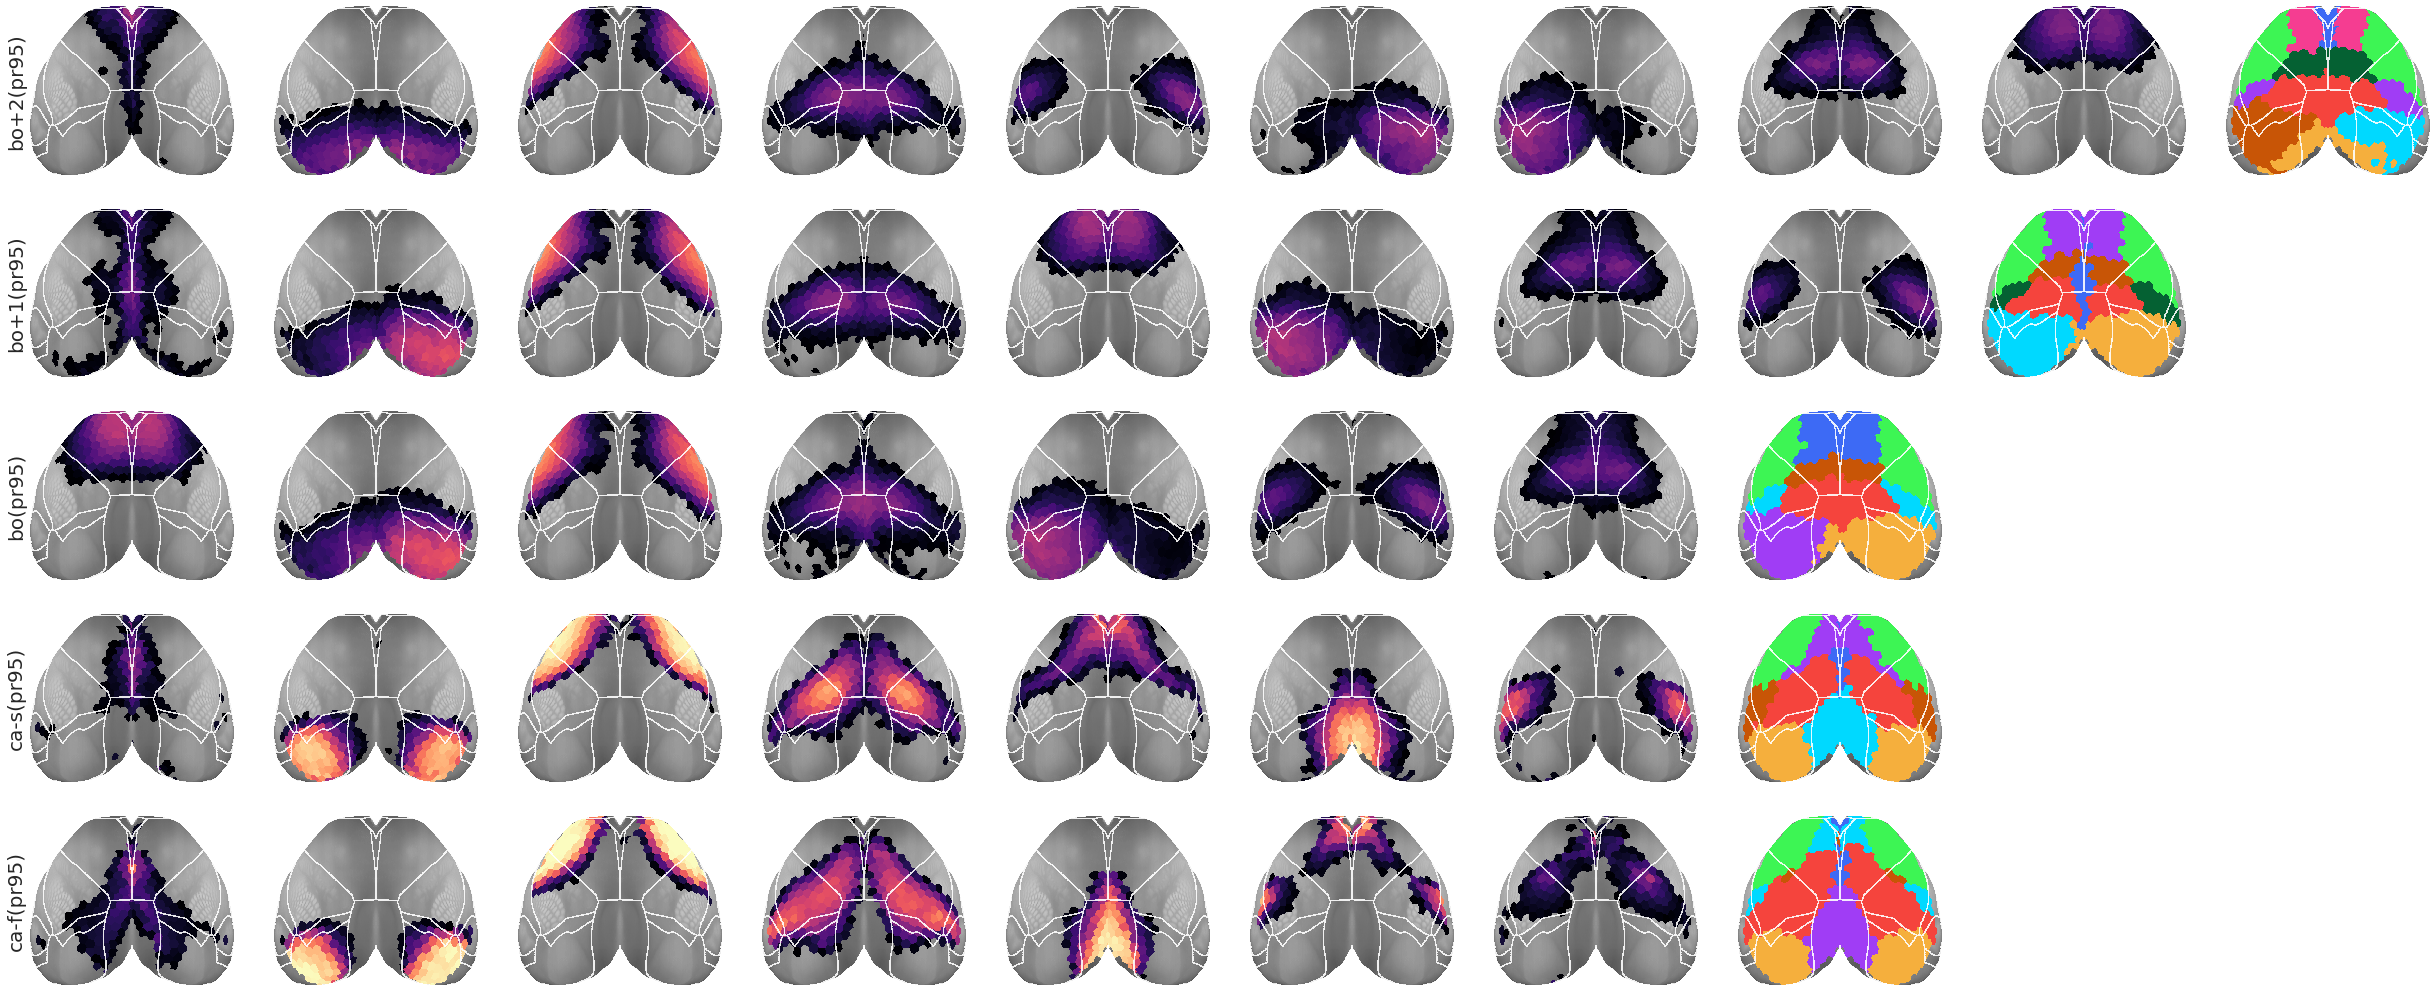

In [7]:
_ = gr_ca.show(
    data={
        'bo+2(pr95)': gr_bo3.pi,
        'bo+1(pr95)': gr_bo2.pi,
        'bo(pr95)': gr_bo.pi,
        'ca-s(pr95)': gr_ca.pi,
        'ca-f(pr95)': gr_ca2.pi},
    figsize=(43, 18),
    ylabel_fontsize=20,
)

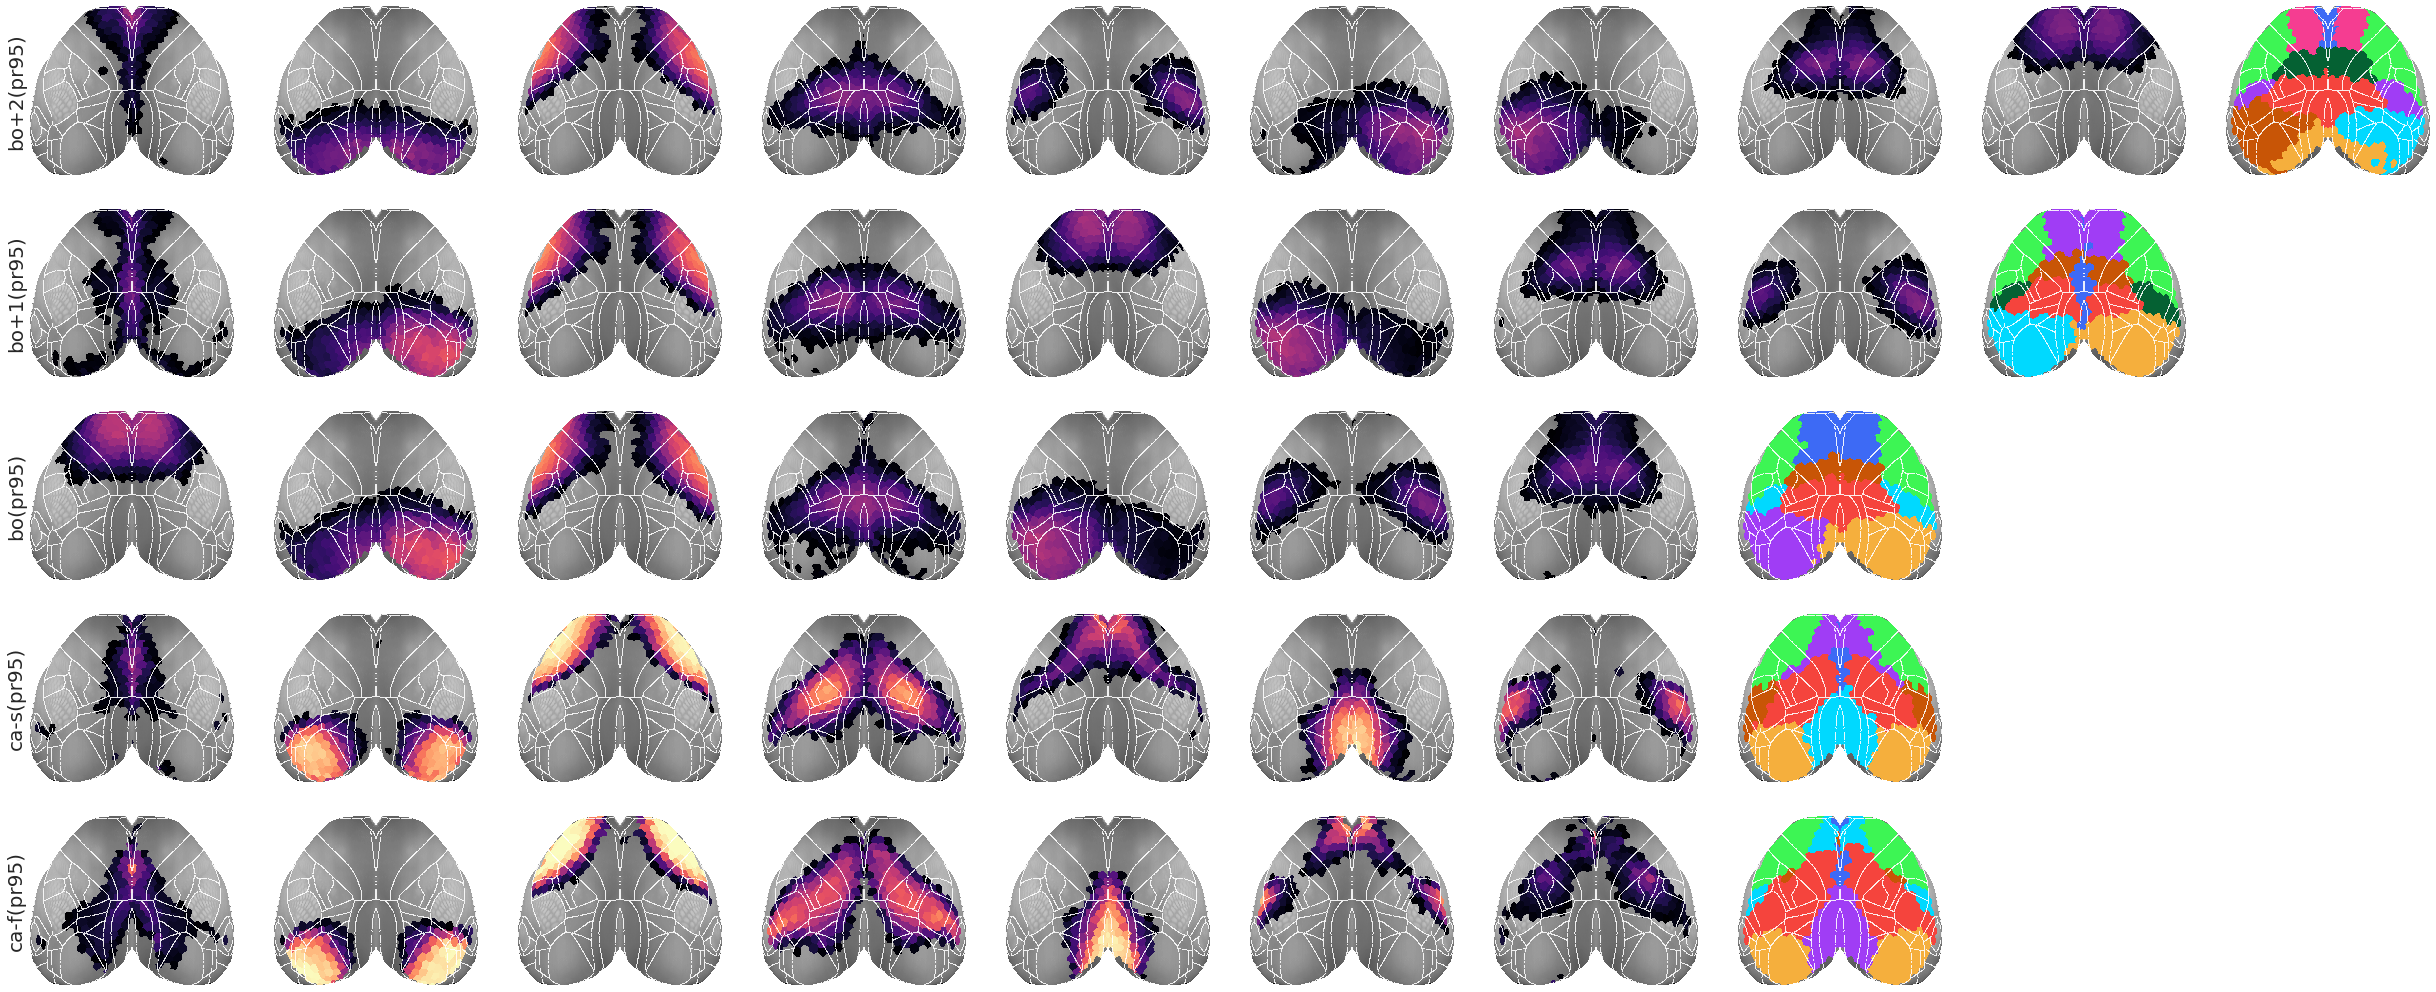

In [8]:
_ = gr_ca.show(
    data={
        'bo+2(pr95)': gr_bo3.pi,
        'bo+1(pr95)': gr_bo2.pi,
        'bo(pr95)': gr_bo.pi,
        'ca-s(pr95)': gr_ca.pi,
        'ca-f(pr95)': gr_ca2.pi},
    figsize=(43, 18),
    ylabel_fontsize=20,
    coarse=False,
    width=0.1,
)

In [32]:
gr_bo2.run_pi = pip_bo2

In [44]:
xxx = gr_bo2._merge_vis(0.5, apply=False)
pi_mg = avg(xxx)

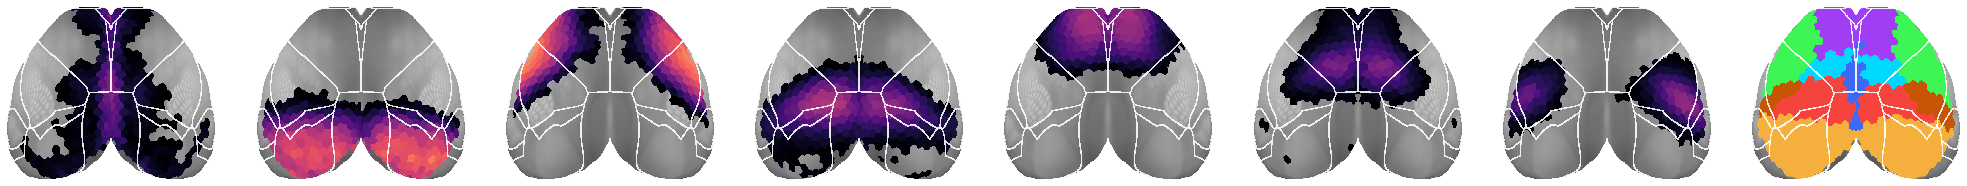

In [48]:
_ = gr_ca.show(pi_mg, figsize=(35, 10))

In [49]:
gr_ca.pi_symmetry_score(avg(xxx))

(
    {
        1: 0.963,
        2: 0.982,
        3: 0.984,
        4: 0.973,
        5: 0.993,
        6: 0.971,
        7: 0.938,
        -1: 0.972
    },
    {
        1: 0.97,
        2: 0.97,
        3: 0.97,
        4: 0.934,
        5: 0.974,
        6: 0.959,
        7: 0.941,
        -1: 0.96
    }
)

In [50]:
list(gr_ca.affil)

[
    'cmap',
    'colors',
    'obj_top',
    'obj_flat',
    'aff_top',
    'aff_flat',
    'regions_l',
    'regions_r',
    'affiliation',
    'regions_affil',
    'regions_affil_max'
]

In [51]:
aaa = dc(gr_ca.affil['obj_flat'])
for i, idx in enumerate(np.unique(gr_ca.affil['obj_flat'][gr_ca.affil['obj_flat'].nonzero()])):
    aaa[gr_ca.affil['obj_flat'] == idx] = i + 1
bbb = dc(gr_ca.affil['obj_top'])
for i, idx in enumerate(np.unique(gr_ca.affil['obj_top'][gr_ca.affil['obj_top'].nonzero()])):
    bbb[gr_ca.affil['obj_top'] == idx] = i + 1

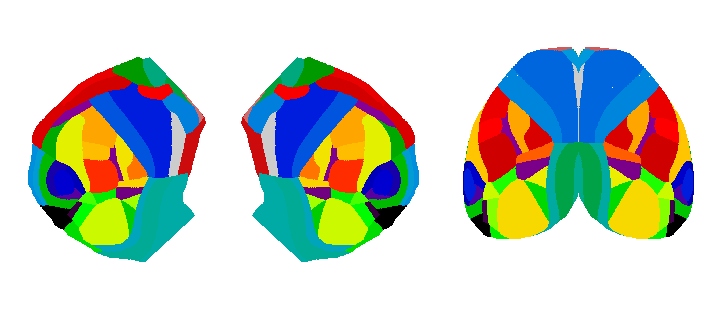

In [52]:
fig, axes = create_figure(1, 2, figsize=(10, 5), width_ratios=[1.7, 1])
axes[0].imshow(mwh(aaa == 0, aaa), cmap='nipy_spectral_r')
axes[1].imshow(mwh(bbb == 0, bbb), cmap='nipy_spectral_r')
remove_ticks(axes)

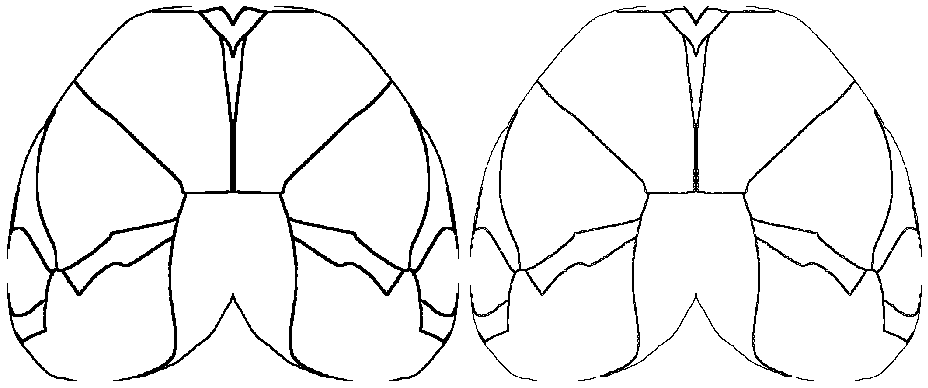

In [53]:
contour_thin = gr_ca.get_contour(width=0.001)
contour_thick = gr_ca.get_contour(width=0.2)

fig, axes = create_figure(1, 2, (13, 6))
axes[0].imshow(contour_thick, cmap='Greys')
axes[1].imshow(contour_thin, cmap='Greys')
remove_ticks(axes)
plt.show()

In [84]:
gr_ca.num_k, gr_ca2.num_k, gr_bo.num_k, gr_bo2.num_k

(7, 7, 7, 8)

In [85]:
h_runs_ca = sp_stats.entropy(bn.nanmean(pip_ca, -3), axis=-2) / np.log(gr_ca.num_k)
h_runs_ca2 = sp_stats.entropy(bn.nanmean(pip_ca2, -3), axis=-2) / np.log(gr_ca2.num_k)
h_runs_bo = sp_stats.entropy(bn.nanmean(pip_bo, -3), axis=-2) / np.log(gr_bo.num_k)
h_runs_bo2 = sp_stats.entropy(bn.nanmean(pip_bo2, -3), axis=-2) / np.log(gr_bo2.num_k)
h_runs_bo_mg = sp_stats.entropy(bn.nanmean(xxx, -3), axis=-2) / np.log(gr_bo.num_k)

h_runs_ca = avg(h_runs_ca, 1)
h_runs_ca2 = avg(h_runs_ca2, 1)
h_runs_bo = avg(h_runs_bo, 1)
h_runs_bo2 = avg(h_runs_bo2, 1)
h_runs_bo_mg = avg(h_runs_bo_mg, 1)

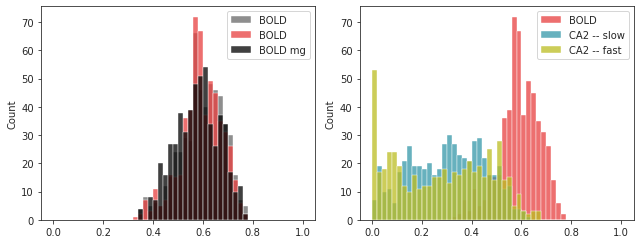

In [87]:
fig, axes = create_figure(1, 2, (9, 3.5))

sns.histplot(h_runs_bo, bins=np.linspace(0, 1, 51), label='BOLD', color='dimgrey', ax=axes[0])
sns.histplot(h_runs_bo2, bins=np.linspace(0, 1, 51), label='BOLD', color=pal[_BOLD], ax=axes[0])
sns.histplot(h_runs_bo_mg, bins=np.linspace(0, 1, 51), label='BOLD mg', color='k', ax=axes[0])
axes[0].legend()

sns.histplot(h_runs_bo2, bins=np.linspace(0, 1, 51), label='BOLD', color=pal[_BOLD], ax=axes[1])
sns.histplot(h_runs_ca, bins=np.linspace(0, 1, 51), label='CA2 -- slow', color=pal[_CAS], ax=axes[1])
sns.histplot(h_runs_ca2, bins=np.linspace(0, 1, 51), label='CA2 -- fast', color=pal[_CAF], ax=axes[1])
axes[1].legend()
plt.show()

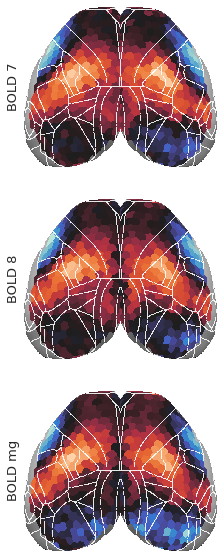

(0.3398982353994052, 0.7792087130226064)

In [88]:
vmin = min(np.nanmin(h_runs_bo), np.nanmin(h_runs_bo2), np.nanmin(h_runs_bo_mg))
vmax = max(np.nanmax(h_runs_bo), np.nanmax(h_runs_bo2), np.nanmax(h_runs_bo_mg))

_ = gr_ca.show(
    data={'BOLD 7': h_runs_bo, 'BOLD 8': h_runs_bo2, 'BOLD mg': h_runs_bo_mg},
    vmin=vmin,
    vmax=vmax,
    mask_thresh=0.001,
    figsize=(7, 10),
    cmap='icefire',
    width=0.001,
    coarse=False,
    add_disjoint=False,
)

vmin, vmax

In [121]:
hr_runs_bo_mg = sp_stats.rankdata(h_runs_bo_mg)
hr_runs_bo2 = sp_stats.rankdata(h_runs_bo2)
hr_runs_bo = sp_stats.rankdata(h_runs_bo)
hr_runs_ca = sp_stats.rankdata(h_runs_ca)
hr_runs_ca2 = np_nans(len(h_runs_ca2))
hr_runs_ca2[np.isfinite(h_runs_ca2)] = sp_stats.rankdata(h_runs_ca2[np.isfinite(h_runs_ca2)])

### bo (THIS THIS THIS THIS THIS THIS)

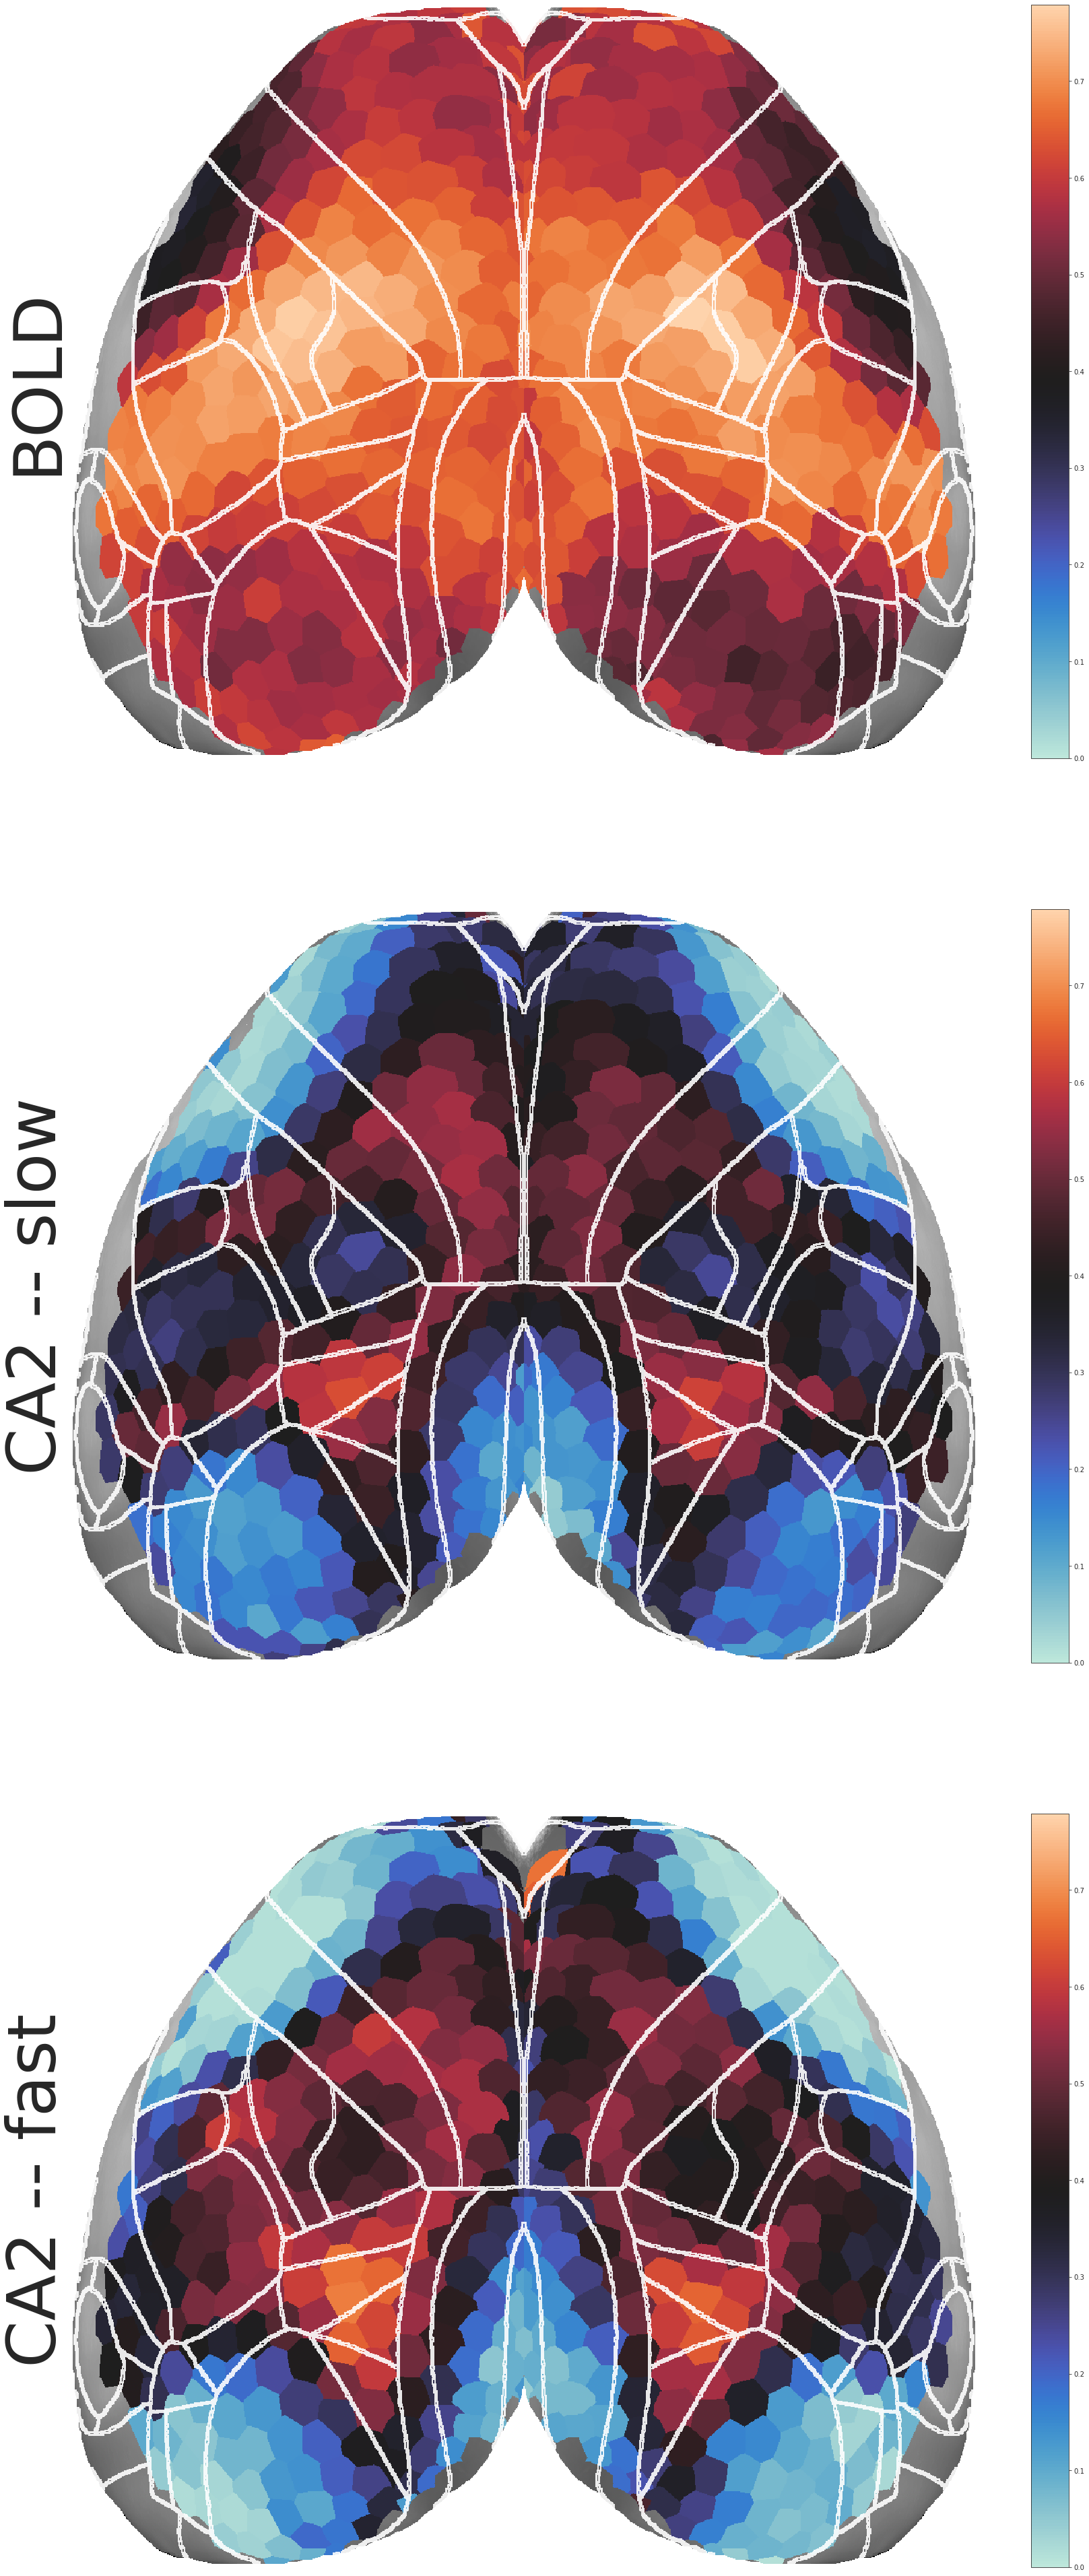

(0.0, 0.7791246260299224)

In [255]:
vmin = min(np.nanmin(h_runs_ca), np.nanmin(h_runs_ca2), np.nanmin(h_runs_bo))
vmax = max(np.nanmax(h_runs_ca), np.nanmax(h_runs_ca2), np.nanmax(h_runs_bo))

_ = gr_ca.show(
    data={'BOLD': h_runs_bo, 'CA2 -- slow': h_runs_ca, 'CA2 -- fast': h_runs_ca2 + 0.01},
    vmin=vmin,
    vmax=vmax,
    mask_thresh=0.0001,
    figsize=(30, 70),
    cmap='icefire',
    cbar=True,
    width=0.001,
    coarse=False,
    add_disjoint=False,
    ylabel_fontsize=100,
)

vmin, vmax

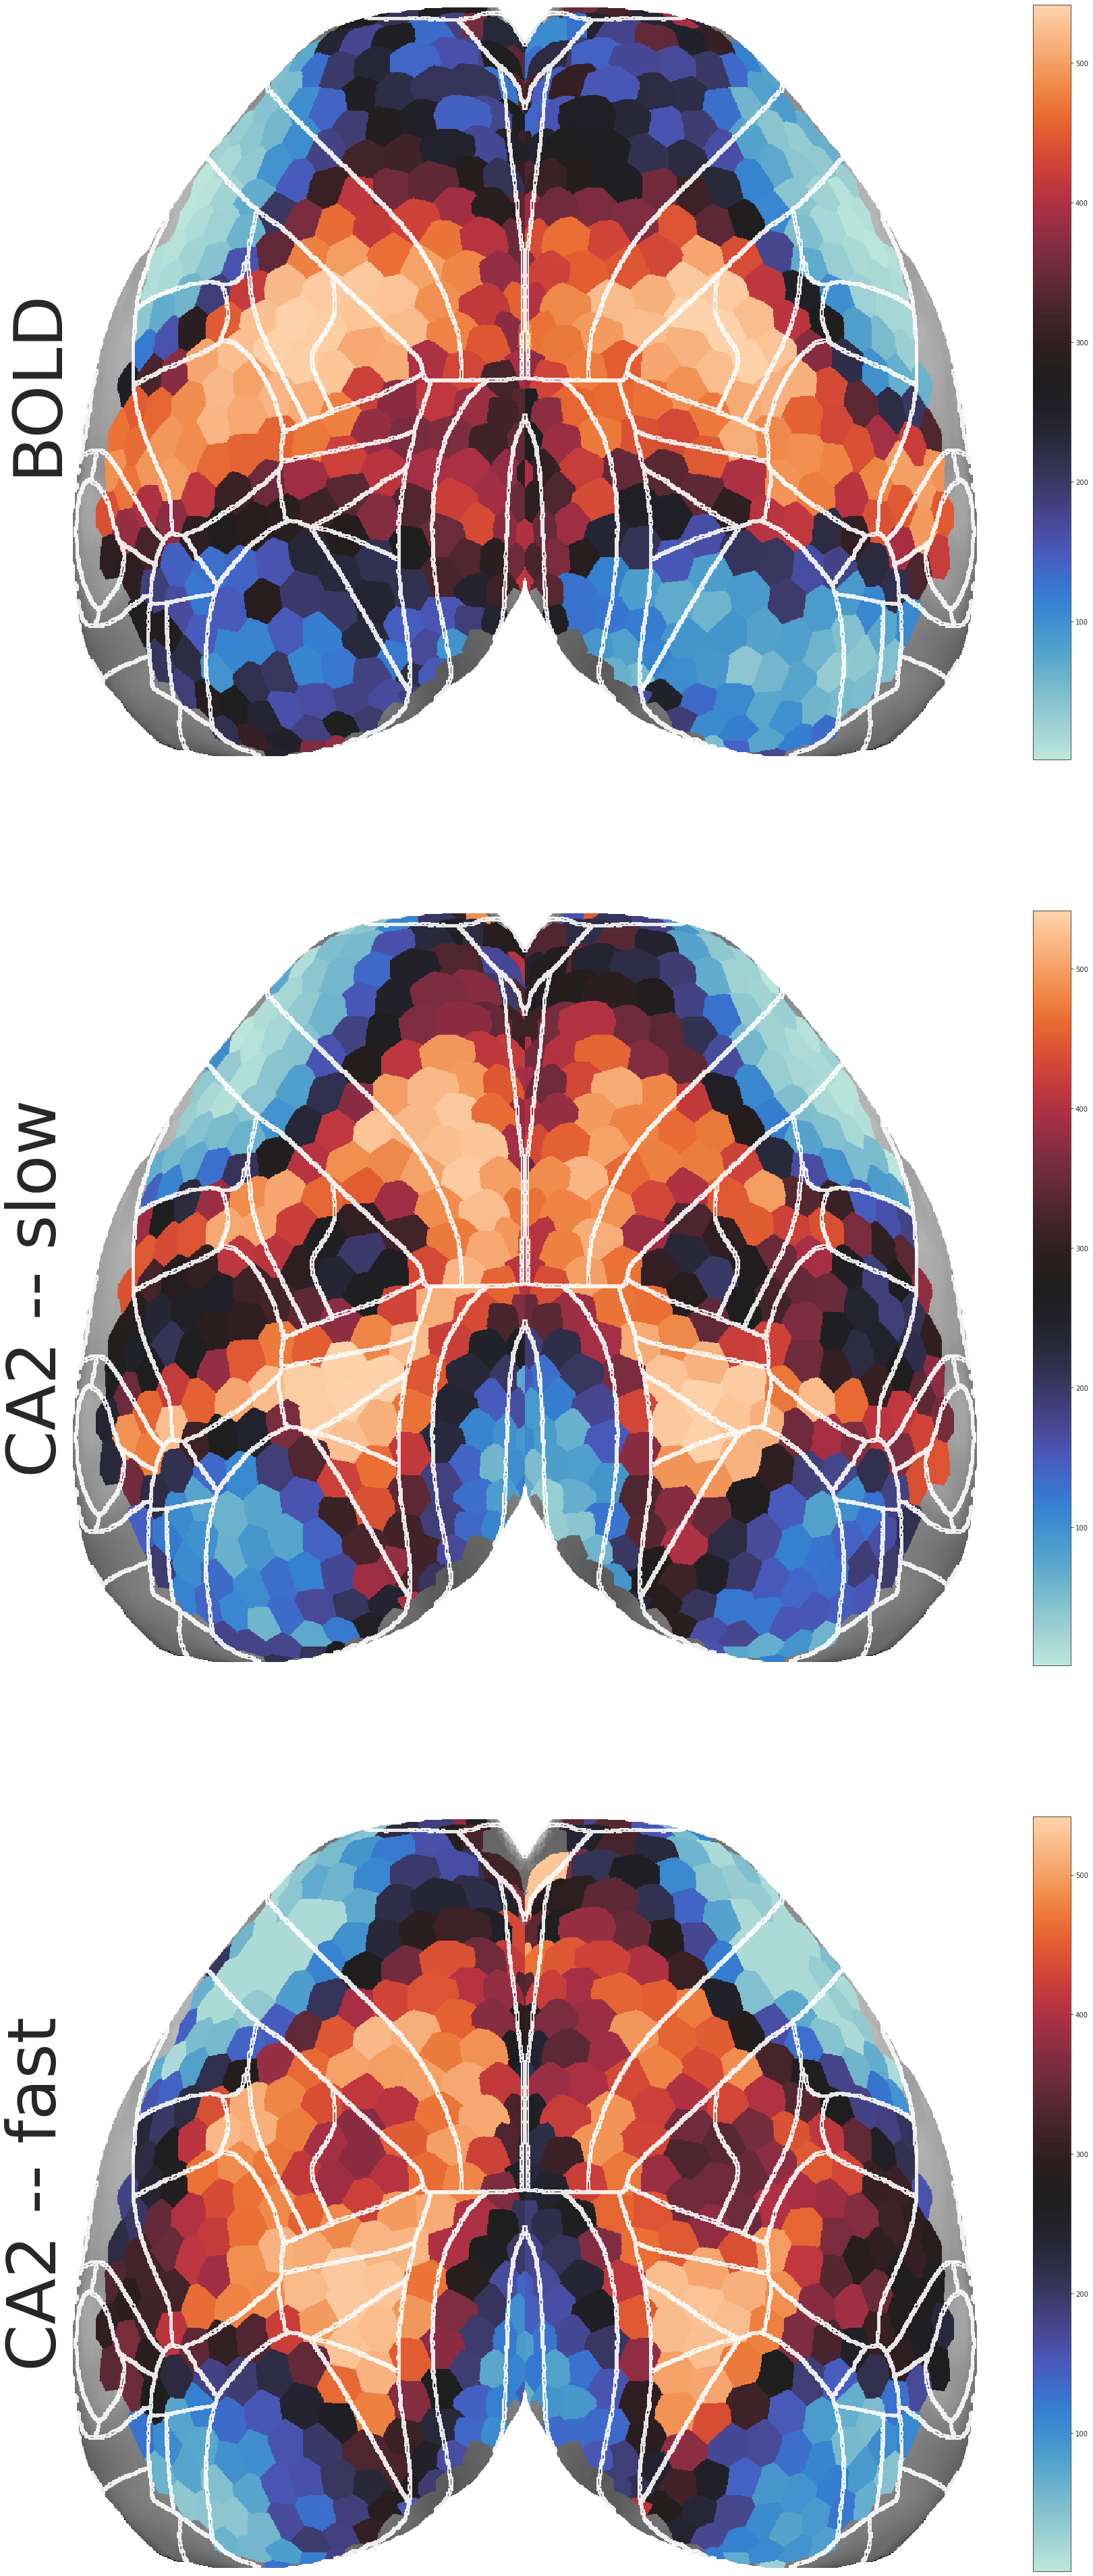

(1.0, 542.0)

In [256]:
vmin = min(np.nanmin(hr_runs_ca), np.nanmin(hr_runs_ca2), np.nanmin(hr_runs_bo))
vmax = max(np.nanmax(hr_runs_ca), np.nanmax(hr_runs_ca2), np.nanmax(hr_runs_bo))

fig, axes = gr_ca.show(
    data={'BOLD': hr_runs_bo, 'CA2 -- slow': hr_runs_ca, 'CA2 -- fast': hr_runs_ca2 + 0.01},
    vmin=vmin,
    vmax=vmax,
    mask_thresh=0.0001,
    figsize=(30, 70),
    cmap='icefire',
    cbar=True,
    width=0.001,
    coarse=False,
    add_disjoint=False,
    ylabel_fontsize=100,
)

vmin, vmax

### bo2

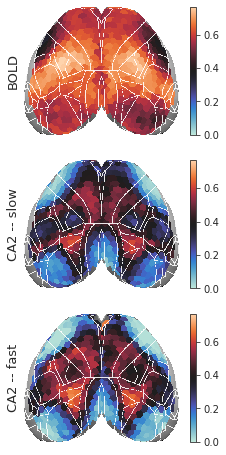

(0.0, 0.7665561144004476)

In [251]:
vmin = min(np.nanmin(h_runs_ca), np.nanmin(h_runs_ca2), np.nanmin(h_runs_bo2))
vmax = max(np.nanmax(h_runs_ca), np.nanmax(h_runs_ca2), np.nanmax(h_runs_bo2))

_ = gr_ca.show(
    data={'BOLD': h_runs_bo2, 'CA2 -- slow': h_runs_ca, 'CA2 -- fast': h_runs_ca2 + 0.01},
    vmin=vmin,
    vmax=vmax,
    mask_thresh=0.0001,
    figsize=(4, 8),
    cmap='icefire',
    cbar=True,
    width=0.001,
    coarse=False,
    add_disjoint=False,
)

vmin, vmax

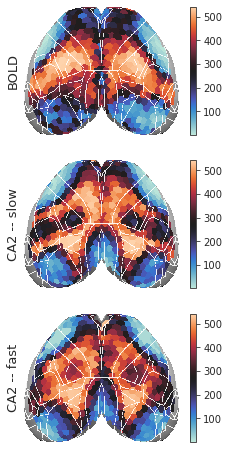

(1.0, 542.0)

In [252]:
vmin = min(np.nanmin(hr_runs_ca), np.nanmin(hr_runs_ca2), np.nanmin(hr_runs_bo2))
vmax = max(np.nanmax(hr_runs_ca), np.nanmax(hr_runs_ca2), np.nanmax(hr_runs_bo2))

fig, axes = gr_ca.show(
    data={'BOLD': hr_runs_bo2, 'CA2 -- slow': hr_runs_ca, 'CA2 -- fast': hr_runs_ca2 + 0.01},
    vmin=vmin,
    vmax=vmax,
    mask_thresh=0.0001,
    figsize=(4, 8),
    cmap='icefire',
    cbar=True,
    width=0.001,
    coarse=False,
    add_disjoint=False,
)

vmin, vmax

### bo _ mg

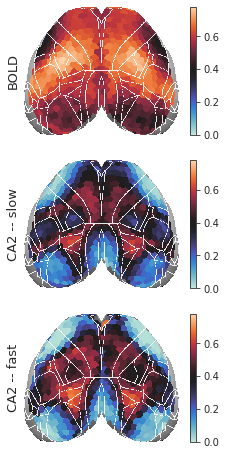

(0.0, 0.7792087130226064)

In [253]:
vmin = min(np.nanmin(h_runs_ca), np.nanmin(h_runs_ca2), np.nanmin(h_runs_bo_mg))
vmax = max(np.nanmax(h_runs_ca), np.nanmax(h_runs_ca2), np.nanmax(h_runs_bo_mg))

_ = gr_ca.show(
    data={'BOLD': h_runs_bo_mg, 'CA2 -- slow': h_runs_ca, 'CA2 -- fast': h_runs_ca2 + 0.01},
    vmin=vmin,
    vmax=vmax,
    mask_thresh=0.0001,
    figsize=(4, 8),
    cmap='icefire',
    cbar=True,
    width=0.001,
    coarse=False,
    add_disjoint=False,
)

vmin, vmax

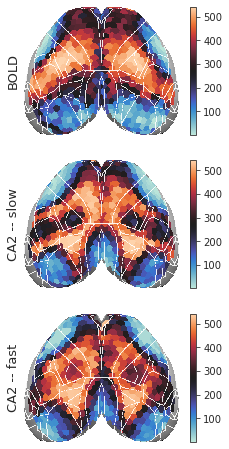

(1.0, 542.0)

In [254]:
vmin = min(np.nanmin(hr_runs_ca), np.nanmin(hr_runs_ca2), np.nanmin(hr_runs_bo_mg))
vmax = max(np.nanmax(hr_runs_ca), np.nanmax(hr_runs_ca2), np.nanmax(hr_runs_bo_mg))

fig, axes = gr_ca.show(
    data={'BOLD': hr_runs_bo_mg, 'CA2 -- slow': hr_runs_ca, 'CA2 -- fast': hr_runs_ca2 + 0.01},
    vmin=vmin,
    vmax=vmax,
    mask_thresh=0.0001,
    figsize=(4, 8),
    cmap='icefire',
    cbar=True,
    width=0.001,
    coarse=False,
    add_disjoint=False,
)

vmin, vmax

## Pairplot

In [139]:
df = {
    _BOLD: h_runs_bo,
    _CAS: h_runs_ca,
    _CAF: h_runs_ca2,
}
df = pd.DataFrame(df)

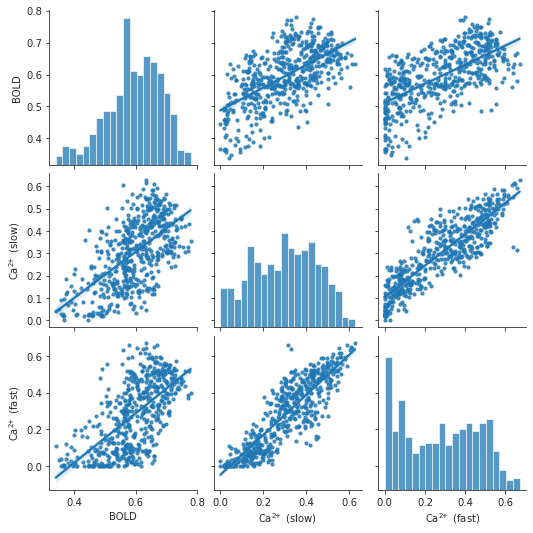

In [140]:
pg = sns.pairplot(
    data=df,
    kind='reg',
    diag_kind='hist',
    palette='muted',
    diag_kws={'fill': True, 'bins': 20},
    plot_kws={'scatter_kws': {'s': 10}},
)
plt.show()

In [141]:
def corr(x, y, kind='spearman'):
    good = np.logical_and(np.isfinite(x), np.isfinite(y))
    if kind == 'spearman':
        return sp_stats.spearmanr(x[good], y[good]).correlation
    elif kind == 'pearson':
        return sp_stats.pearsonr(x[good], y[good])[0]

In [142]:
msg = '--- Pearson r ---\n\n'
msg += f"BOLD vs. Ca (slow):  {corr(h_runs_bo, h_runs_ca, 'pearson'):0.3f}\n"
msg += f"BOLD vs. Ca (fast):  {corr(h_runs_bo, h_runs_ca2, 'pearson'):0.3f}\n"
msg += f"Ca (slow) vs. Ca (fast):  {corr(h_runs_ca, h_runs_ca2, 'pearson'):0.3f}\n"
print(msg)

--- Pearson r ---

BOLD vs. Ca (slow):  0.608
BOLD vs. Ca (fast):  0.634
Ca (slow) vs. Ca (fast):  0.874

## Permutation test

In [ ]:
c = gr_ca.get_contour(0.2, False)
c = mwh(~c, c)

In [153]:
h1 = sp_stats.entropy(bn.nanmean(pip_bo, -3), axis=-2) / np.log(gr_bo.num_k)
h2 = sp_stats.entropy(bn.nanmean(pip_ca, -3), axis=-2) / np.log(gr_ca.num_k)
h3 = sp_stats.entropy(bn.nanmean(pip_ca2, -3), axis=-2) / np.log(gr_ca2.num_k)

In [154]:
y1 = h1.reshape(-1, h1.shape[-1])
y2 = h2.reshape(-1, h2.shape[-1])
y3 = h3.reshape(-1, h3.shape[-1])

In [155]:
good_runs = ~np.logical_or(
    np.isnan(y1).sum(1) == y1.shape[-1],
    np.isnan(y2).sum(1) == y2.shape[-1],
    np.isnan(y3).sum(1) == y3.shape[-1],
)
good_runs.sum()

108

In [156]:
y1 = y1[good_runs]
y2 = y2[good_runs]
y3 = y3[good_runs]

In [157]:
def statistic(a, b, axis):
    return bn.nanmean(a - b, axis=axis)

### h1 vs h2

In [226]:
tr_src = (~np.isnan(avg(h1, 1) + avg(h2, 1))).astype(float)
tr_src = gr_ca.project_vec(tr_src)
tr_src = gr_ca.trim2d(tr_src)

good_nodes = np.logical_and(
    np.isnan(y1).sum(0) < good_runs.sum() // 1.5,
    np.isnan(y2).sum(0) < good_runs.sum() // 1.5,
)
good_nodes.sum()

525

In [227]:
%%time

test = sp_stats.permutation_test(
    data=(y1[:, good_nodes], y2[:, good_nodes]),
    statistic=statistic,
    permutation_type='samples',
    alternative='two-sided',
    n_resamples=int(1e5),
    vectorized=True,
    random_state=42,
    batch=5,
    axis=0,
)

CPU times: user 1min 14s, sys: 44.9 ms, total: 1min 14s
Wall time: 1min 14s


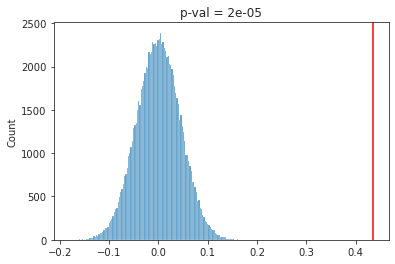

In [228]:
ii = 38

sns.histplot(test.null_distribution[:, ii])
plt.axvline(test.statistic[ii], color='r')
plt.title(f"p-val = {test.pvalue[ii]:0.2g}")
plt.show()

In [229]:
rejected, pvals, *_ = multipletests(test.pvalue, method='fdr_bh')
rejected.sum(), rejected.sum() / good_nodes.sum(), np.array_equal(pvals < 0.05, rejected)

(516, 0.9828571428571429, True)

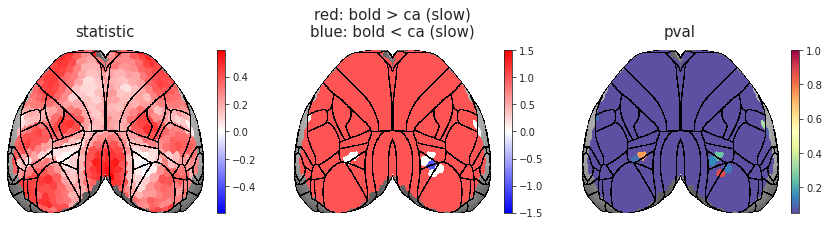

In [230]:
_statistic = np_nans(h1.shape[-1])
_pvalues = np_nans(h2.shape[-1])

_statistic[good_nodes] = test.statistic
_pvalues[good_nodes] = pvals

tr_statistic = gr_ca.project_vec(_statistic, add_disjoint=False, thres=-np.inf)
tr_pvals = gr_ca.project_vec(_pvalues, add_disjoint=False, thres=-np.inf)
tr_statistic = gr_ca.trim2d(tr_statistic)
tr_pvals = gr_ca.trim2d(tr_pvals)

fig, axes = create_figure(1, 3, (12, 3))
axes[0].imshow(mwh(tr_src['top'] == 0, tr_statistic['top']), cmap='Greys_r')
axes[1].imshow(mwh(tr_src['top'] == 0, tr_statistic['top']), cmap='Greys_r')
axes[2].imshow(mwh(tr_src['top'] == 0, tr_statistic['top']), cmap='Greys_r')

alpha = 0.05

vminmax = np.nanmax(np.abs(test.statistic))
im = axes[0].imshow(
    mwh(tr_src['proj-top'][0] == 0, tr_statistic['proj-top'][0]),
    cmap='bwr', vmin=-vminmax, vmax=vminmax)
axes[0].set_title('statistic', fontsize=15, y=1.05)
plt.colorbar(im, ax=axes[0])

x = tr_statistic['proj-top'][0].copy()
x[x > 0] = 1
x[x < 0] = -1
x[tr_pvals['proj-top'][0] >= alpha] = 0

im = axes[1].imshow(
    mwh(tr_src['proj-top'][0] == 0.0, x),
    cmap='bwr', vmin=-1.5, vmax=1.5)
axes[1].set_title('red: bold > ca (slow)\nblue: bold < ca (slow)', fontsize=15, y=1.05)
plt.colorbar(im, ax=axes[1])

im = axes[2].imshow(
    mwh(tr_src['proj-top'][0] == 0, tr_pvals['proj-top'][0]),
    cmap='Spectral_r', vmin=alpha, vmax=1)
axes[2].set_title('pval', fontsize=15, y=1.05)
plt.colorbar(im, ax=axes[2])

axes[0].imshow(c, cmap='Greys_r')
axes[1].imshow(c, cmap='Greys_r')
axes[2].imshow(c, cmap='Greys_r')

remove_ticks(axes)
plt.show()

### h1 vs h3

In [232]:
tr_src = (~np.isnan(avg(h1, 1) + avg(h3, 1))).astype(float)
tr_src = gr_ca.project_vec(tr_src)
tr_src = gr_ca.trim2d(tr_src)

good_nodes = np.logical_and(
    np.isnan(y1).sum(0) < good_runs.sum() // 1.2,
    np.isnan(y3).sum(0) < good_runs.sum() // 1.2,
)
good_nodes.sum()

491

In [233]:
%%time

test = sp_stats.permutation_test(
    data=(y1[:, good_nodes], y3[:, good_nodes]),
    statistic=statistic,
    permutation_type='samples',
    alternative='two-sided',
    n_resamples=int(1e5),
    vectorized=True,
    random_state=42,
    batch=5,
    axis=0,
)

CPU times: user 1min 12s, sys: 56.9 ms, total: 1min 12s
Wall time: 1min 12s


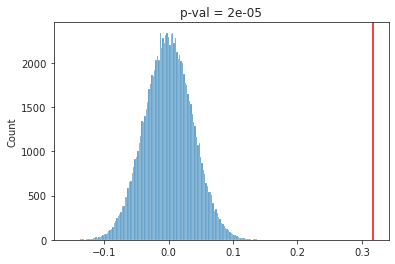

In [234]:
ii = 38

sns.histplot(test.null_distribution[:, ii])
plt.axvline(test.statistic[ii], color='r')
plt.title(f"p-val = {test.pvalue[ii]:0.2g}")
plt.show()

In [235]:
rejected, pvals, *_ = multipletests(test.pvalue, method='fdr_bh')
rejected.sum(), rejected.sum() / good_nodes.sum(), np.array_equal(pvals < 0.05, rejected)

(481, 0.9796334012219959, True)

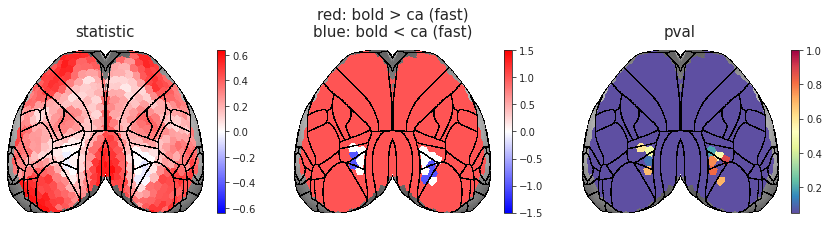

In [236]:
_statistic = np_nans(h1.shape[-1])
_pvalues = np_nans(h2.shape[-1])

_statistic[good_nodes] = test.statistic
_pvalues[good_nodes] = pvals

tr_statistic = gr_ca.project_vec(_statistic, add_disjoint=False, thres=-np.inf)
tr_pvals = gr_ca.project_vec(_pvalues, add_disjoint=False, thres=-np.inf)
tr_statistic = gr_ca.trim2d(tr_statistic)
tr_pvals = gr_ca.trim2d(tr_pvals)

fig, axes = create_figure(1, 3, (12, 3))
axes[0].imshow(mwh(tr_src['top'] == 0, tr_statistic['top']), cmap='Greys_r')
axes[1].imshow(mwh(tr_src['top'] == 0, tr_statistic['top']), cmap='Greys_r')
axes[2].imshow(mwh(tr_src['top'] == 0, tr_statistic['top']), cmap='Greys_r')

alpha = 0.05

vminmax = np.nanmax(np.abs(test.statistic))
im = axes[0].imshow(
    mwh(tr_src['proj-top'][0] == 0, tr_statistic['proj-top'][0]),
    cmap='bwr', vmin=-vminmax, vmax=vminmax)
axes[0].set_title('statistic', fontsize=15, y=1.05)
plt.colorbar(im, ax=axes[0])

x = tr_statistic['proj-top'][0].copy()
x[x > 0] = 1
x[x < 0] = -1
x[tr_pvals['proj-top'][0] >= alpha] = 0

im = axes[1].imshow(
    mwh(tr_src['proj-top'][0] == 0.0, x),
    cmap='bwr', vmin=-1.5, vmax=1.5)
axes[1].set_title('red: bold > ca (fast)\nblue: bold < ca (fast)', fontsize=15, y=1.05)
plt.colorbar(im, ax=axes[1])

im = axes[2].imshow(
    mwh(tr_src['proj-top'][0] == 0, tr_pvals['proj-top'][0]),
    cmap='Spectral_r', vmin=alpha, vmax=1)
axes[2].set_title('pval', fontsize=15, y=1.05)
plt.colorbar(im, ax=axes[2])

axes[0].imshow(c, cmap='Greys_r')
axes[1].imshow(c, cmap='Greys_r')
axes[2].imshow(c, cmap='Greys_r')

remove_ticks(axes)
plt.show()

### h2 vs h3

In [237]:
tr_src = (~np.isnan(avg(h2, 1) + avg(h3, 1))).astype(float)
tr_src = gr_ca.project_vec(tr_src)
tr_src = gr_ca.trim2d(tr_src)

good_nodes = np.logical_and(
    np.isnan(y2).sum(0) < good_runs.sum() // 1.2,
    np.isnan(y3).sum(0) < good_runs.sum() // 1.2,
)
good_nodes.sum()

491

In [238]:
%%time

test = sp_stats.permutation_test(
    data=(y2[:, good_nodes], y3[:, good_nodes]),
    statistic=statistic,
    permutation_type='samples',
    alternative='two-sided',
    n_resamples=int(1e5),
    vectorized=True,
    random_state=42,
    batch=5,
    axis=0,
)

CPU times: user 1min 12s, sys: 88.7 ms, total: 1min 12s
Wall time: 1min 12s


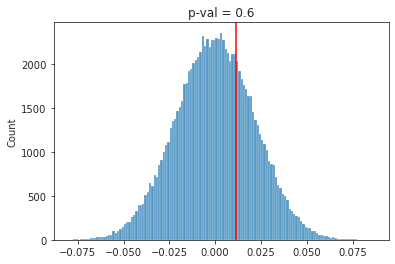

In [239]:
ii = 38

sns.histplot(test.null_distribution[:, ii])
plt.axvline(test.statistic[ii], color='r')
plt.title(f"p-val = {test.pvalue[ii]:0.2g}")
plt.show()

In [240]:
rejected, pvals, *_ = multipletests(test.pvalue, method='fdr_bh')
rejected.sum(), rejected.sum() / good_nodes.sum(), np.array_equal(pvals < 0.05, rejected)

(304, 0.6191446028513238, True)

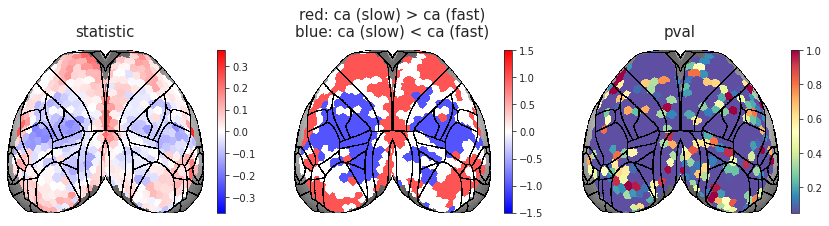

In [241]:
_statistic = np_nans(h1.shape[-1])
_pvalues = np_nans(h2.shape[-1])

_statistic[good_nodes] = test.statistic
_pvalues[good_nodes] = pvals

tr_statistic = gr_ca.project_vec(_statistic, add_disjoint=False, thres=-np.inf)
tr_pvals = gr_ca.project_vec(_pvalues, add_disjoint=False, thres=-np.inf)
tr_statistic = gr_ca.trim2d(tr_statistic)
tr_pvals = gr_ca.trim2d(tr_pvals)

fig, axes = create_figure(1, 3, (12, 3))
axes[0].imshow(mwh(tr_src['top'] == 0, tr_statistic['top']), cmap='Greys_r')
axes[1].imshow(mwh(tr_src['top'] == 0, tr_statistic['top']), cmap='Greys_r')
axes[2].imshow(mwh(tr_src['top'] == 0, tr_statistic['top']), cmap='Greys_r')

alpha = 0.05

vminmax = np.nanmax(np.abs(test.statistic))
im = axes[0].imshow(
    mwh(tr_src['proj-top'][0] == 0, tr_statistic['proj-top'][0]),
    cmap='bwr', vmin=-vminmax, vmax=vminmax)
axes[0].set_title('statistic', fontsize=15, y=1.05)
plt.colorbar(im, ax=axes[0])

x = tr_statistic['proj-top'][0].copy()
x[x > 0] = 1
x[x < 0] = -1
x[tr_pvals['proj-top'][0] >= alpha] = 0

im = axes[1].imshow(
    mwh(tr_src['proj-top'][0] == 0.0, x),
    cmap='bwr', vmin=-1.5, vmax=1.5)
axes[1].set_title('red: ca (slow) > ca (fast)\nblue: ca (slow) < ca (fast)', fontsize=15, y=1.05)
plt.colorbar(im, ax=axes[1])

im = axes[2].imshow(
    mwh(tr_src['proj-top'][0] == 0, tr_pvals['proj-top'][0]),
    cmap='Spectral_r', vmin=alpha, vmax=1)
axes[2].set_title('pval', fontsize=15, y=1.05)
plt.colorbar(im, ax=axes[2])

axes[0].imshow(c, cmap='Greys_r')
axes[1].imshow(c, cmap='Greys_r')
axes[2].imshow(c, cmap='Greys_r')

remove_ticks(axes)
plt.show()

## Deg needs debugging

In [96]:
deg_ca= gr_ca.collect_degrees()
deg_bo= gr_bo.collect_degrees()

deg_ca= np.concatenate([np.expand_dims(v, 0) for v in deg_ca.values()])
deg_bo= np.concatenate([np.expand_dims(v, 0) for v in deg_bo.values()])

<AxesSubplot:ylabel='Count'>

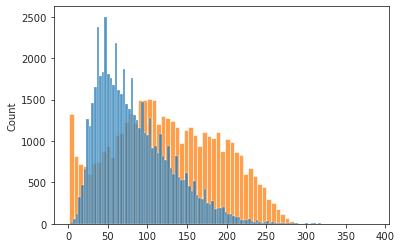

In [97]:
sns.histplot(deg_ca[np.isfinite(deg_ca)], color='C1')
sns.histplot(deg_bo[np.isfinite(deg_bo)])

In [25]:
deg_ca= gr_ca.collect_degrees()
deg_ca= np.concatenate([np.expand_dims(v, 0) for v in deg_ca.values()])
deg_ca= bn.nanmean(deg_ca, 0)
deg_ca.shape

(542,)

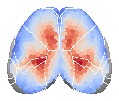

In [26]:
_ = gr_ca.show(deg_ca, cmap='coolwarm', vmin=np.nanmin(deg_ca), vmax=np.nanmax(deg_ca), add_disjoint=False)

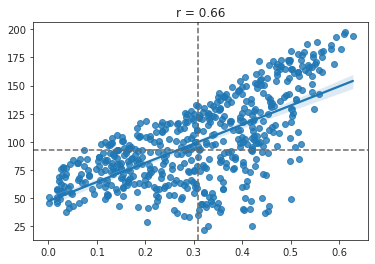

In [28]:
sns.regplot(h_runs_ca, deg_ca)
plt.axvline(np.nanmedian(h_runs_ca), color='dimgrey', ls='--')
plt.axhline(np.nanmedian(deg_ca), color='dimgrey', ls='--')
plt.title(f"r = {sp_stats.pearsonr(h_runs_ca, deg_ca)[0]:0.2f}")
plt.show()

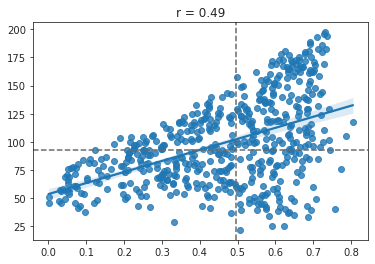

In [29]:
sns.regplot(h_ca, deg_ca)
plt.axvline(np.nanmedian(h_ca), color='dimgrey', ls='--')
plt.axhline(np.nanmedian(deg_ca), color='dimgrey', ls='--')
plt.title(f"r = {sp_stats.pearsonr(h_ca, deg_ca)[0]:0.2f}")
plt.show()

In [30]:
deg_bo = gr_bo.collect_degrees()
deg_bo = np.concatenate([np.expand_dims(v, 0) for v in deg_bo.values()])
deg_bo = bn.nanmean(deg_bo, 0)
deg_bo.shape

(542,)

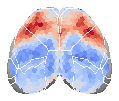

In [31]:
_ = gr_bo.show(deg_bo, cmap='coolwarm', vmin=np.nanmin(deg_bo), vmax=np.nanmax(deg_bo), add_disjoint=False)

<AxesSubplot:ylabel='Count'>

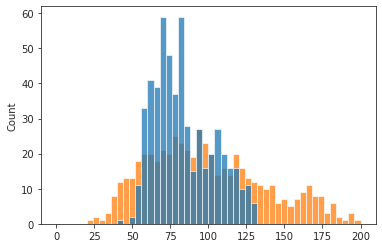

In [32]:
sns.histplot(deg_ca, bins=np.linspace(0, 200, 51), color='C1')
sns.histplot(deg_bo, bins=np.linspace(0, 200, 51))

In [33]:
h_bo = sp_stats.entropy(pi_bo, axis=-2) / np.log(gr_bo.num_k)
h_runs_bo = sp_stats.entropy(bn.nanmean(pip_bo, -3), axis=-2) / np.log(gr_bo.num_k)
h_runs_bo = avg(h_runs_bo, 1)

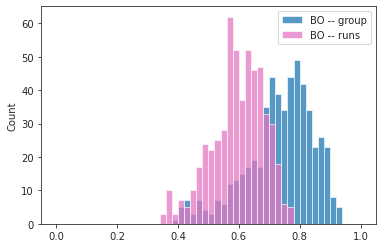

In [34]:
sns.histplot(h_bo, bins=np.linspace(0, 1, 51), label='BO -- group')
sns.histplot(h_runs_bo, bins=np.linspace(0, 1, 51), label='BO -- runs', color='C6')
plt.legend()
plt.show()

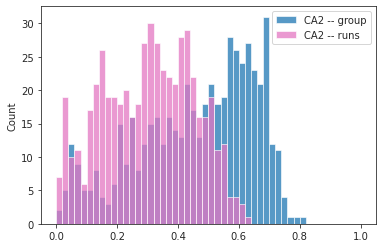

In [35]:
sns.histplot(h_ca, bins=np.linspace(0, 1, 51), label='CA2 -- group')
sns.histplot(h_runs_ca, bins=np.linspace(0, 1, 51), label='CA2 -- runs', color='C6')
plt.legend()
plt.show()

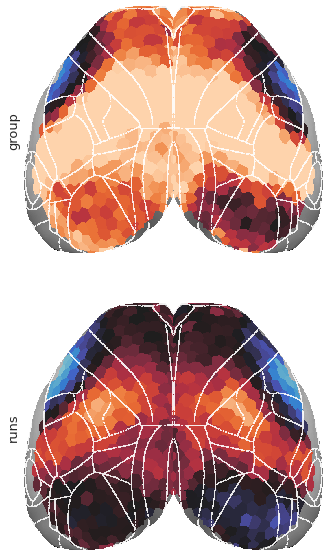

In [36]:
_ = gr_ca.show(
    data={'group': h_bo, 'runs': h_runs_bo},
    vmin=0.3,
    vmax=0.8,
    figsize=(7, 10),
    cmap='icefire',
    width=0.001,
    coarse=False,
    add_disjoint=False,
)

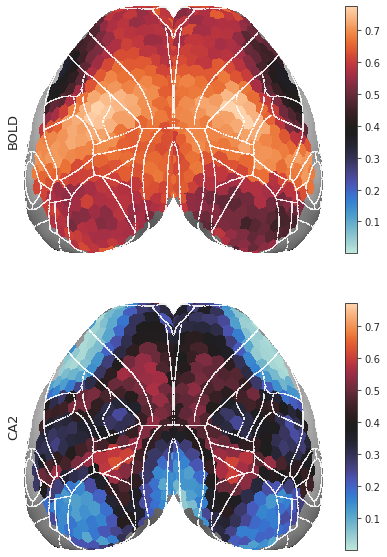

In [52]:
_ = gr_ca.show(
    data={'BOLD': h_runs_bo, 'CA2': h_runs_ca},
    vmin=min(np.nanmin(h_runs_ca), np.nanmin(h_runs_bo)),
    vmax=max(np.nanmax(h_runs_ca), np.nanmax(h_runs_bo)),
    figsize=(8, 10),
    cmap='icefire',
    cbar=True,
    width=0.001,
    coarse=False,
    add_disjoint=False,
)

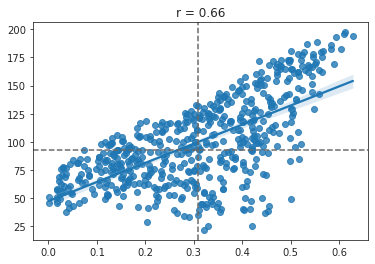

In [37]:
sns.regplot(h_runs_ca, deg_ca)
plt.axvline(np.nanmedian(h_runs_ca), color='dimgrey', ls='--')
plt.axhline(np.nanmedian(deg_ca), color='dimgrey', ls='--')
plt.title(f"r = {sp_stats.pearsonr(h_runs_ca, deg_ca)[0]:0.2f}")
plt.show()

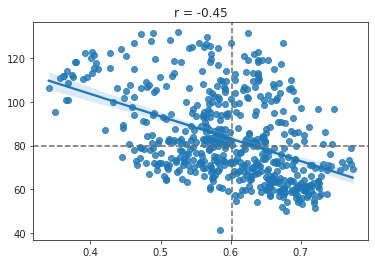

In [39]:
sns.regplot(h_runs_bo, deg_bo)
plt.axvline(np.nanmedian(h_runs_bo), color='dimgrey', ls='--')
plt.axhline(np.nanmedian(deg_bo), color='dimgrey', ls='--')
plt.title(f"r = {sp_stats.pearsonr(h_runs_bo, deg_bo)[0]:0.2f}")
plt.show()

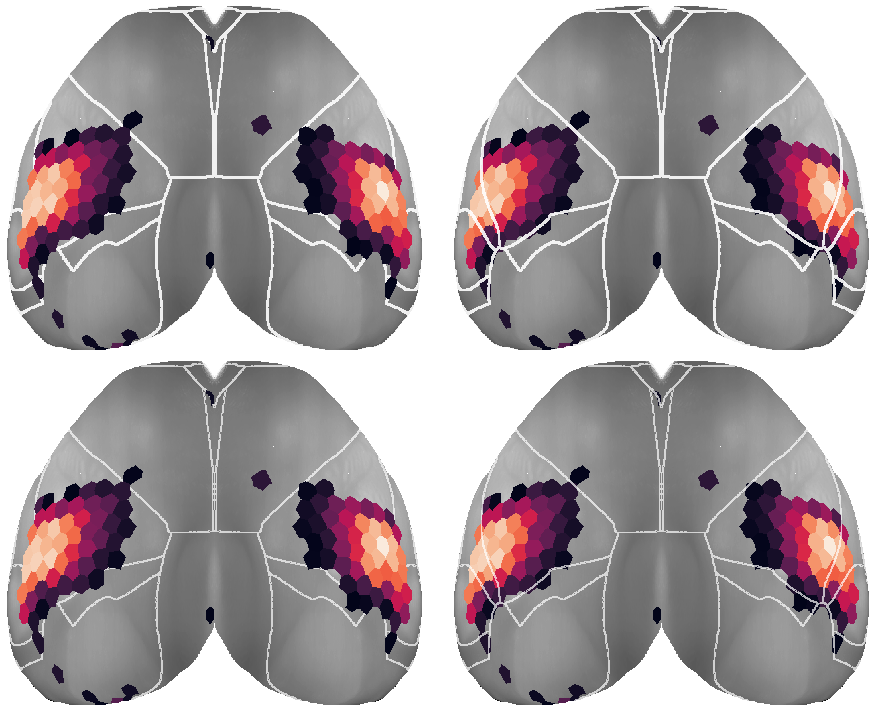

In [30]:
fig, axes = create_figure(2, 2, (13, 10))
axes[0, 0].imshow(mwh(tr['top'] == 0, tr['top']), cmap='Greys_r')
axes[0, 0].imshow(mwh(~contour_thick, contour_thick), cmap='Greys', alpha=0.9)
axes[0, 0].imshow(x2p)

axes[0, 1].imshow(mwh(tr['top'] == 0, tr['top']), cmap='Greys_r')
axes[0, 1].imshow(x2p)
axes[0, 1].imshow(mwh(~contour_thick, contour_thick), cmap='Greys', alpha=0.9)

axes[1, 0].imshow(mwh(tr['top'] == 0, tr['top']), cmap='Greys_r')
axes[1, 0].imshow(mwh(~contour_thin, contour_thin), cmap='Greys', alpha=0.7)
axes[1, 0].imshow(x2p)

axes[1, 1].imshow(mwh(tr['top'] == 0, tr['top']), cmap='Greys_r')
axes[1, 1].imshow(x2p)
axes[1, 1].imshow(mwh(~contour_thin, contour_thin), cmap='Greys', alpha=0.7)

remove_ticks(axes)
plt.show()

<matplotlib.image.AxesImage object at 0x7fac786f75e0>

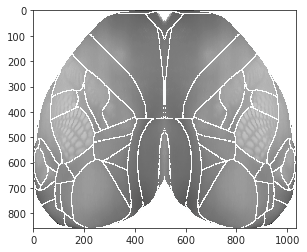

In [18]:
plt.imshow(mwh(tr['top'] == 0, tr['top']), cmap='Greys_r')
plt.imshow(mwh(~contour_thin, contour_thin), cmap='bone_r', vmin=0, vmax=100)